# Анализ данных интренет-магазина "Стримчик"

**Цель исследования:** выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Перед нами данные до 2016 года. 

**Ход исследования**

1. Изучить общую информацию, т.е. сделать обзор данных.
2. Предобработка данных:
- Заменить названия столбцов
- Преобразовать данные в нужные типы.
- Обработать пропуски при необходимости
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
3. Провести исследовательский анализ данных
- Посмотреть, сколько игр выпускалось в разные годы.
- Посмотреть, как менялись продажи по платформам. Построить распределение по годам.
- Выбрать несколько потенциально прибыльных платформ.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Посмотреть на общее распределение игр по жанрам.
4. Составить портрет пользователя каждого региона.
5. Проверить гипотезы.
6. Общий вывод.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# Загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st 

In [2]:
# Загружаем данные из файла в датафрейм. Указываем два пути, как открыть файл: в локальном юпитере и в тренажёре
try:
    data = pd.read_csv('/Users/User/Downloads/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
# Получаем общую информацию о полученном датафрейме.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** Рассмотрев общую информацию по полученным данным, видим, что есть пропущенные значения, так как количество строк разное. Также не везде соответствует тип данных, например в годе релиза не может быть float, надо заменить на int и в столбце с оценкой пользователей надо тоже изменить тип с object на float. Для этого сначала обработаем пропуски, а затем изменим тип данных. Еще нужно поменять названия столбцов, так как они все написаны с заглавной буквы, т.е. в верхнем регистре.  

### Предобработка данных

1. Заменим названия столбцов (приведём к нижнему регистру)

In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


2. Находим и изучаем пропущенные значения в столбцах:

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Видим, что есть всего 2 % пропущенных значения в столбце year_of_release. Эти пропуски можно удалить, их мало, а оставлять нецелесообразно, так как пропущенные значения могут мешать дальнейшему исследованию. Большое количество пропусков в critic_score, user_score, rating. Вероятно это связано с тем, что не всегда пользователи дают обратную связь и оставляют отзывы и оценки. В столбцах user_score и critic_score так как Nan имеет тип float, то мы попробуем работать с данными из этого столбца, не удаляя и не заменяя пропущенные значения. В столбце rating заменим пропуски на Unknown. В столбцах name и genre по 2 пропущенных значения, поэтому их мы тоже удалим. 

In [7]:
# Заменим пропущенные значения в столбце rating на unknown
data['rating'] = data['rating'].fillna('Unknown')

In [8]:
# Удалим пропущенные значения в столбцах year_of_release, name, genre
data.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)

In [9]:
#pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

3. Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему

In [10]:
# Меняем тип данных в столбце year_of_release, так как год не может быть вещественным числом.
data['year_of_release'] = data['year_of_release'].astype('int64')

In [11]:
# Смотрим уникальные значения в столбце user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

 Не можем поменять тип данных в столбце user_score на float, так как появляется строковое значение tbd. Это сокращение расшифровывается To Be Determined, то есть "Будет определено". Стоит отметить также, что у этой аббревиатуры могут быть и иные значения, например To Be Done - должно быть сделано, или To Be Discussed - подлежит обсуждению. Поэтому принудительно заменим это сокращение на nan, испоьзуя метод to_numeric с параметром errors = 'coerce'.

In [12]:
# Заменяем сокращение tbd nan и меняем тип данных в столбце user_score
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')
data['user_score'] = data['user_score'].astype('float64')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Таким образом, поменяли тип данных в двух столбцах год релиза и оценка пользователей. В остальных типы данных установлены корректно. Теперь перейдем к исследованию дубликатов.

In [14]:
# Проверяем явные дубликаты.
data.duplicated().sum()

0

Видим, что дубликаты отсутствуют.

4. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [15]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [16]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


**Вывод:** На этапе предобработки данных поменяли названия столбцов, привели их к нижнему регистру. Увидели, что имеются пропущенные значения в столбцах. В столбце year_of_release строки с пропущенными значениями удалили, так как их было мало, а также в этом поменяли тип данных на int. В столбце critic_score пропуски заменили на среднее значение, а в столбцах user_score и rating оставили nan без изменений. В столбце user_score сокращение tbd заменили на nan и поменяли тип данных этого столбца на float. Дубликатов нет.

### Проведите исследовательский анализ данных

1. Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

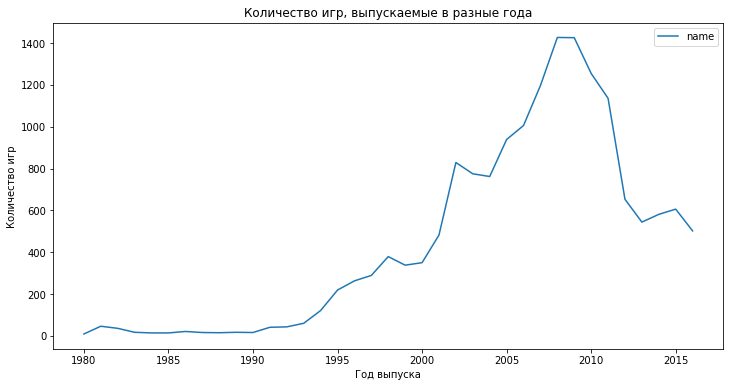

In [17]:
# Посмотрим, сколько игр выпускалось в разные годы. Для этого посторим график.
count_game_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize = (12,6))
sns.lineplot(data = count_game_year)
plt.title('Количество игр, выпускаемые в разные года')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

In [18]:
# Посмотрим количество игр, выпускаемых  по годам
count_games = data.groupby('year_of_release')['name'].count()
count_games

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Видим, что выпуск игр увеличивается с 1995 года. До этого года выпускались единицы. Особенный рост с 2000 года. Поэтому данные до 2000 года рассматривать нет смысла. Пик создания и продаж компьютерных игр приходится с 2006 по 2011 годы

2. Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитываем в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [19]:
# Выбераем платформы с наибольшими суммарными продажами
platform_sum = data.pivot_table(
    index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending=False)

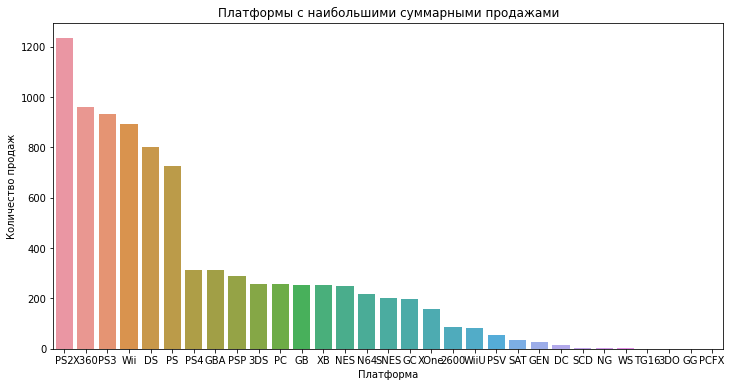

In [20]:
plt.figure(figsize = (12,6))
sns.barplot(x = platform_sum.index,y = platform_sum['total_sales'])
plt.title('Платформы с наибольшими суммарными продажами')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

In [21]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Самое большое количество продаж имеют 6 платформ. Это PS2, X360, PS3, Wii, DS, PS

In [22]:
# Создаем отдельную таблицу 5 самых продаваемых платформ. 
pop_platforms = data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
pop_platforms = pop_platforms.reset_index().rename_axis(None, axis=1)

In [23]:
# Напишем функцию, которая отделит самые продаваемые платформы 
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 1980)]
    total = slicee.pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

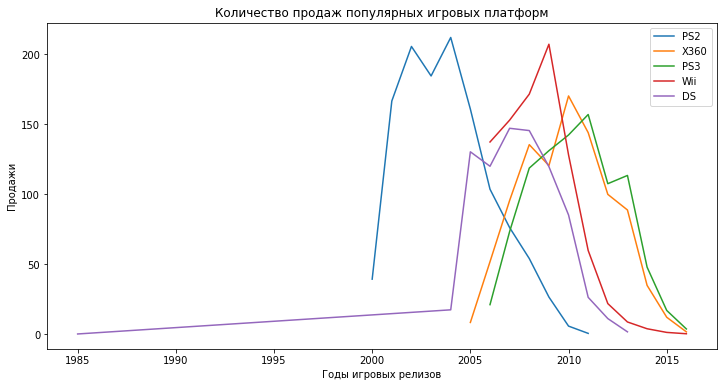

In [24]:
#Отрисуем все игровые платформы и их поведение
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(pop_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,data)['total_sales'], label=i)
    plt.legend()

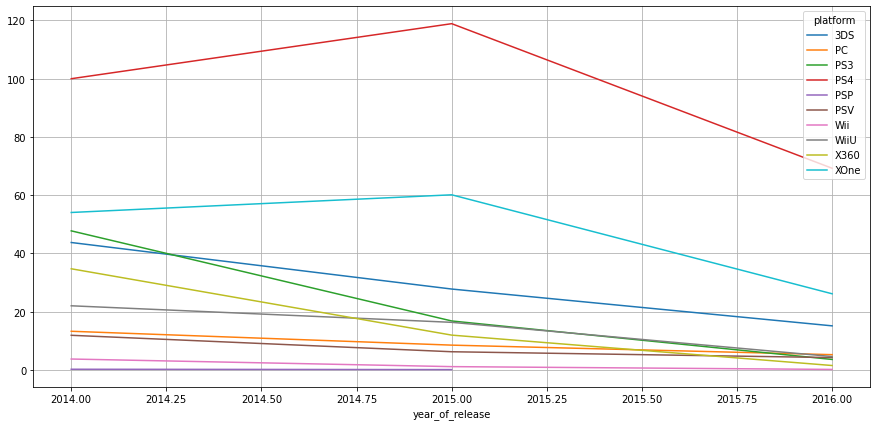

In [25]:
# Выберем актуальный период с 2014 по 2016 год
data = data.query('year_of_release >= 2014')
# построим график распределения по годам в актуальный период
data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

Из графика видно, что в среднем каждая игровая платформа существует примерно 10 лет. Также мы увидели, что с 2000 года только 5 платформ являются лидерами продаж. Поэтому PS хоть имела большое количество продаж, но это было давно до 2000 года, поэтому мы не будем рассматривать ее как топ. Самое большое количество продаж у PS2 и X360. Игровая платформа  WII имела большую поппулярность в 2009 году и резко пошла на спад. Так как данные за 2016 год не полные, за актуальный период взяли года с 2014 по 2016 год. И в эти года видим, продажи поппулярных игр идут на спад, а лидерами являются две игры это PS4 и XOne.

3. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

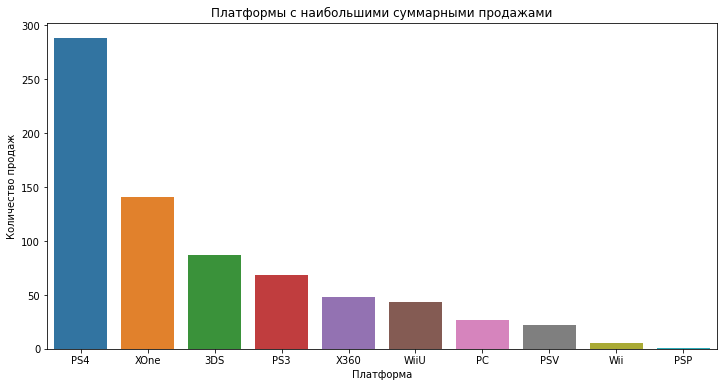

In [26]:
# Определим 5 платформ, которые являются лидерами продаж в актуальном периоде
platform_summ = data.pivot_table(
    index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending=False)
plt.figure(figsize = (12,6))
sns.barplot(x = platform_summ.index,y = platform_summ['total_sales'])
plt.title('Платформы с наибольшими суммарными продажами')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

Лидерами продаж в актуальном периоде являются PS4, XOne, 3DS, PS3, X360.

In [27]:
# Посмотрим на распределение платформ с помощью describe()
data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


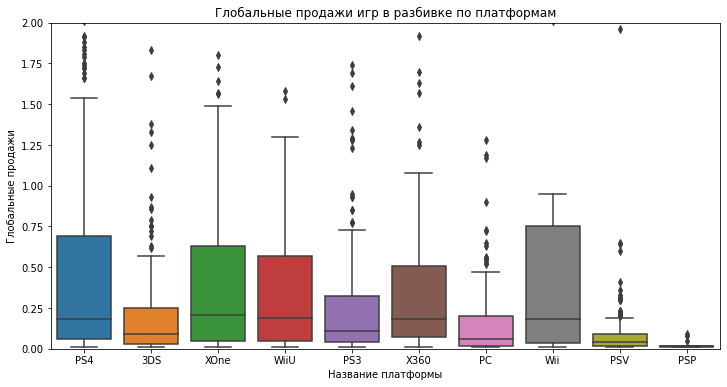

In [28]:
# Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам с помощью boxplot()
plt.figure(figsize = (12,6))
sns.boxplot(data = data, x = 'platform', y = 'total_sales')
plt.ylim(0, 2)
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Глобальные продажи')
plt.show()

На графиках видим, что распределение данных у всех платформ разное. Стандартное отклонение сильно отличается от среднего значения и от медианы. Также видим, что есть выбросы, но их оставим.

4. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

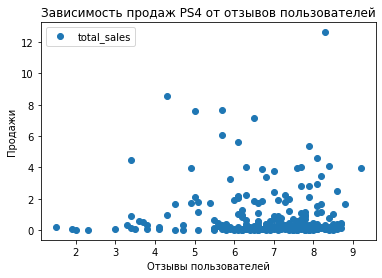

-0.040131589472697356

In [29]:
# Как влияют на продажи отзывы пользователей? Возьмем платформу PS4
# Строим диаграмму рассеяния

user_score_ps4 = data[data['platform'] == 'PS4']
user_score_ps4.plot(x = 'user_score', y = 'total_sales', style = 'o')
plt.title('Зависимость продаж PS4 от отзывов пользователей')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.show()

# считаем корреляцию
user_score_ps4['user_score'].corr(user_score_ps4['total_sales'])

На графике видно, что больше продаж игр, имеющих оценку пользователей больше 6.  Коэффициент корреляции Пирсона -0,04(отрицательный). Это говорит о том, что при увеличении оценки, продажи не возрастают. Таким образом, видим, что количество продаж PS4 не зависит от оценки пользователей. 

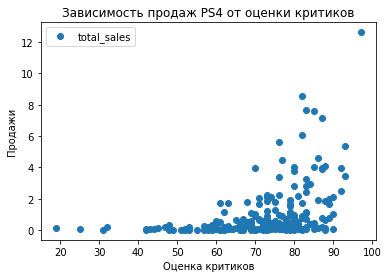

0.40266141068104083

In [30]:
# Как влияют на продажи отзывы критиков? Посмотрим на примере PS4
# Строим диаграмму рассеяния
critic_score_ps4 = data[data['platform'] == 'PS4']
critic_score_ps4.plot(x = 'critic_score', y = 'total_sales', style = 'o')
plt.title('Зависимость продаж PS4 от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

# считаем корреляцию
critic_score_ps4['critic_score'].corr(user_score_ps4['total_sales'])

На графике видно, что чаще покупаются игры платформы PS, у которых оценка критиков больше 80. Коэффициент корреляции Пирсона - 0,4(положительный). Это говорит о том, что отзывы критиков влияют на количество продаж. Таким образом, приходим к выводу, что количество продаж имеет зависимость от оценки критиков.

In [31]:
# Напишем функцию, которая сравнит зависимость продаж от оценки пользователей и критиков на других платформах
def platforms_matrix(name):
    platform = data[data['platform'] == name]
    fig, ax = plt.subplots(1 ,2, figsize=(12,6))
    sns.scatterplot(x = 'user_score', y ='total_sales', data = platform, ax = ax[0])
    sns.scatterplot(x ='critic_score', y ='total_sales', data = platform, ax = ax[1])
    fig.suptitle(name)
    ax[0].set(xlabel = 'Оценка пользователей')
    ax[1].set(xlabel = 'Оценка критиков')
    ax[0].set(ylabel = 'Количество продаж')
    ax[1].set(ylabel = 'Количество продаж')
    plt.show()
    
    user_correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    print('Корреляция между оценкой пользователей и продажами:', user_correl)
    print('Корреляция между оценкой критиков и продажами:', critic_correl)

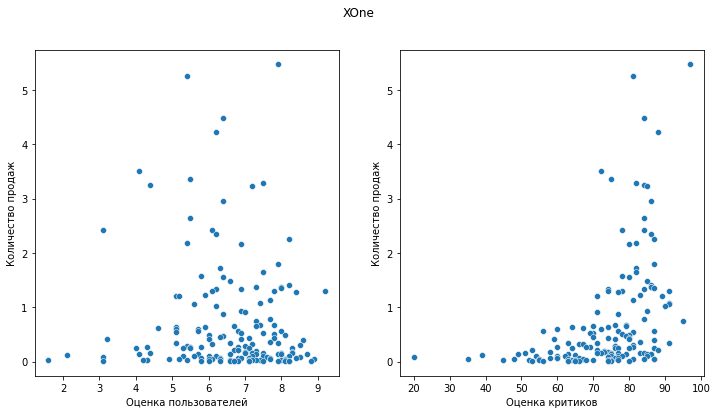

Корреляция между оценкой пользователей и продажами: -0.0703839280647581
Корреляция между оценкой критиков и продажами: 0.42867694370333226


In [32]:
# Посмотрим зависимость продаж от оценки пользователей и критиков на платформе XOne
platforms_matrix('XOne')

На графиках видно, что чаще продаются игры XOne, у которых оценка пользователей больше 6 и оценка критиков больше 70. Но по корреляции Пирсона видно, что количество продаж ,больше зависит от оценки критиков, чем от оценки пользователей. 

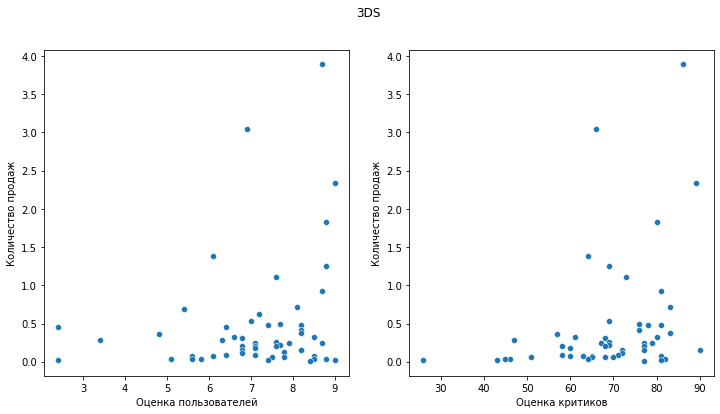

Корреляция между оценкой пользователей и продажами: 0.2151932718527028
Корреляция между оценкой критиков и продажами: 0.314117492869051


In [33]:
# Посмотрим зависимость продаж от оценки пользователей и критиков на платформе 3DS
platforms_matrix('3DS')

На графиках видно, что среди игр платформы 3DS почти нет зависимости от оценки критиков и пользователей. Корреляция Пирсона положительная и зависимость продаж от оценки критиков больше, чем от оценки пользователей.

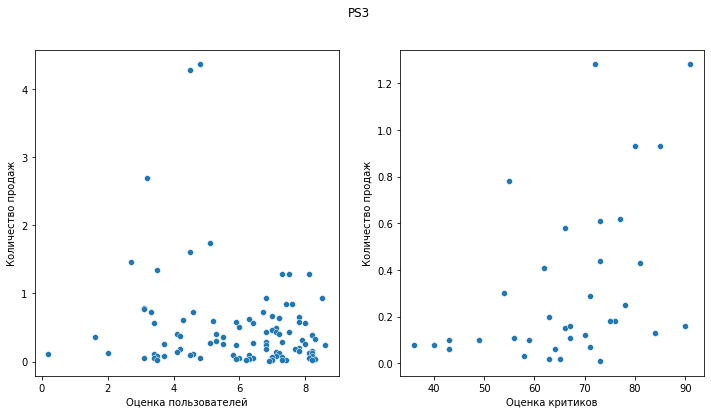

Корреляция между оценкой пользователей и продажами: -0.16676141347662118
Корреляция между оценкой критиков и продажами: 0.44657460493190704


In [34]:
# Посмотрим зависимость продаж от оценки пользователей и критиков на платформе Wii
platforms_matrix('PS3')

Корреляция Пирсона между оценкой критиков и продажами положительная, значит, имеется зависимость, а вот корреляция между оценкой пользователей и продажами отрицательная, значит зависимости нет.

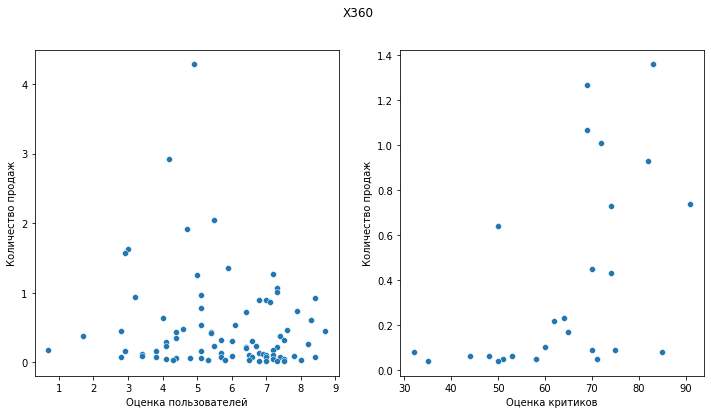

Корреляция между оценкой пользователей и продажами: -0.138444570945665
Корреляция между оценкой критиков и продажами: 0.5257228356581523


In [35]:
# Посмотрим зависимость продаж от оценки пользователей и критиков на платформе X360
platforms_matrix('X360')

Из графиков и корреляции Пирсона видно, что дело с продажами игр на платформе X360 обстоит примерно также, как и на других популярных платформах актуального периода. Продажи зависят от оценки критиков,  а не от оценки пользователей.

Вывод: Рассмотрев зависимость продаж популярных платформ от оценки пользователей и критиков, видим, что продажа поппулярных игр не имеет зависимости  от оценки пользователей, но напрямую зависит от оценки критиков

5. Посмотрим на общее распределение игр по жанрам. 

In [36]:
# Используя сводную таблицу, посмотрим количество продаж по жанрам
genre_sales = data.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre_sales = genre_sales.reset_index().rename_axis(None, axis=1)
display(genre_sales)


,genre,total_sales
0,Action,199.36
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


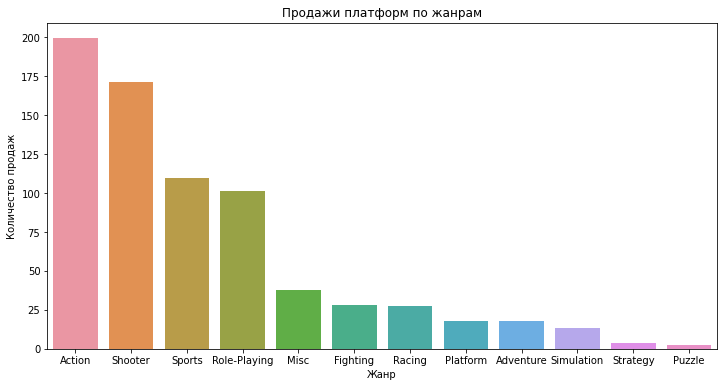

In [37]:
# Для наглядности построим график продаж по жанрам
plt.figure(figsize = (12,6))
sns.barplot(x = genre_sales['genre'],y = genre_sales['total_sales'])
plt.title('Продажи платформ по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

In [38]:
# Посмотрим на распределение платформ с помощью describe()
data.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63


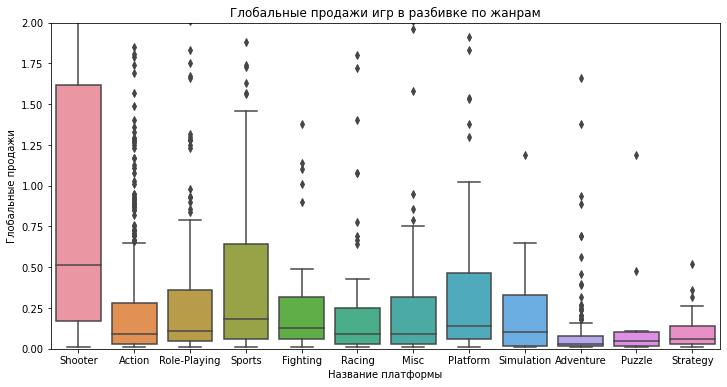

In [39]:
# Строим график «ящик с усами» по глобальным продажам игр в разбивке по жанрам с помощью boxplot()
plt.figure(figsize = (12,6))
sns.boxplot(data = data, x = 'genre', y = 'total_sales')
plt.ylim(0, 2)
plt.title('Глобальные продажи игр в разбивке по жанрам')
plt.xlabel('Название платформы')
plt.ylabel('Глобальные продажи')
plt.show()

Самый прибыльный жанр в актуальном периоде Shooter. Он приносит больше всего продаж Меньше всего продаж в жанре Puzzle

**Вывод:** Проведя исследовательский анализ данных, видим, что выпуск игр увеличивается с 1995 года. До этого года выпускались единицы. Особенный рост с 2000 года. Пик приходится на 2006-2011 годы. В среднем каждая игровая платформа существует примерно 10 лет. Также мы увидели, что в актуальный период(с 2014 по 2016 годы) только 5 платформ являются лидерами продаж. Это PS4, XOne,3DS, PS3, X360. Лидерами продаж являются платформы PS4 и XOne. Wii быстро стала поппулярна, но очень быстро исчезла. Рассмотрев зависимость продаж популярных платформ от оценки пользователей и критиков, видим, что продажа поппулярных игр не имеет зависимость от оценки пользователей, в то время как оценка критиков влияет на продажи. Самые прибыльный жанр - Shooter.А жанр Puzzle продается меньше всего.

### Составьте портрет пользователя каждого региона

1. Определите для пользователя каждого региона (NA, EU, JP)
Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [40]:
# Определяем 5 популярных платформ в Северной Америке
pop_platforms_na_sales = data.pivot_table(
    index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
pop_platforms_na_sales = pop_platforms_na_sales.reset_index().rename_axis(None, axis = 1)
pop_platforms_na_sales.head()

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


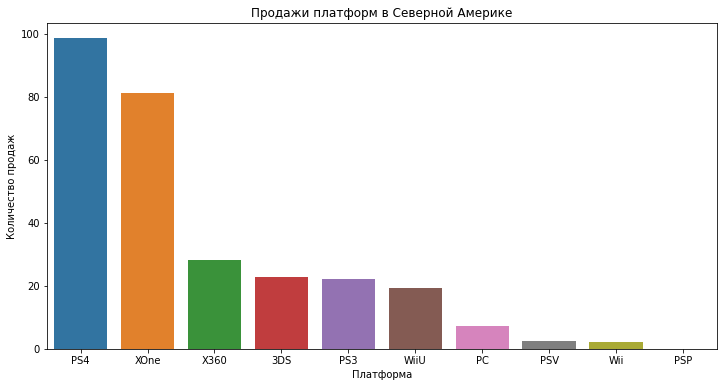

In [41]:
# Строим график продаж в Северной Америке
plt.figure(figsize = (12,6))
sns.barplot(x = pop_platforms_na_sales['platform'],y = pop_platforms_na_sales['na_sales'])
plt.title('Продажи платформ в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

Самые популярные игровые платформы в Северной Америке PS4, XOne, X360, 3DS и PS3.

In [42]:
# Посчитаем долю продаж популярных платформ в Северной Америке от общих продаж
platform_na = pop_platforms_na_sales.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head()
platform_count_full = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head()
percent_sale_na = platform_na / platform_count_full * 100
display(percent_sale_na.sort_values(ascending = False))


platform
X360    58.689341
XOne    57.901111
PS4     34.221760
PS3     32.340862
3DS     26.119059
dtype: float64

Видим, почти 59% продаж Х360 и 58% XOne от общих продаж приходится на Северную Америку. Посмотрев, на долю продаж видим, что среди американцев очень популярны игры, так как основная доля продаж находится именно в Северной Америке. 

In [43]:
# Определяем 5 популярных платформ в Европе
pop_platforms_eu_sales = data.pivot_table(
    index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
pop_platforms_eu_sales = pop_platforms_eu_sales.reset_index().rename_axis(None, axis = 1)
pop_platforms_eu_sales.head()

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


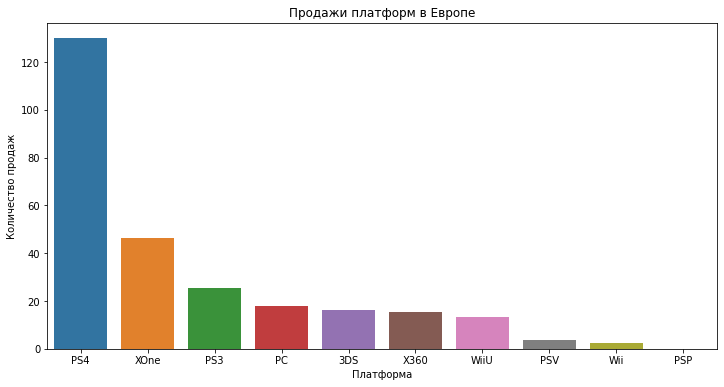

In [44]:
# Строим график продаж в Европе
plt.figure(figsize = (12,6))
sns.barplot(x = pop_platforms_eu_sales['platform'],y = pop_platforms_eu_sales['eu_sales'])
plt.title('Продажи платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

Популярные платформы в Европе такие же, как и в Северной Америке PS4, XOne, X360, 3DS и PS3. 

In [45]:
# Посчитаем долю продаж популярных платформ в Европе от общих продаж
platform_eu = pop_platforms_eu_sales.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head()
percent_sale_eu = platform_eu / platform_count_full * 100
display(percent_sale_eu.sort_values(ascending = False))

platform
PS4     45.129273
PS3     37.459666
XOne    32.950983
3DS     18.597139
PC            NaN
X360          NaN
dtype: float64

В Европе самая поопулярная платформа PS4. Ее доля продаж в Европе от общих продаж составляет 45 %.

In [46]:
# Определяем 5 популярных платформ в Японии
pop_platforms_jp_sales = data.pivot_table(
    index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)
pop_platforms_jp_sales = pop_platforms_jp_sales.reset_index().rename_axis(None, axis = 1)
pop_platforms_jp_sales.head()

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


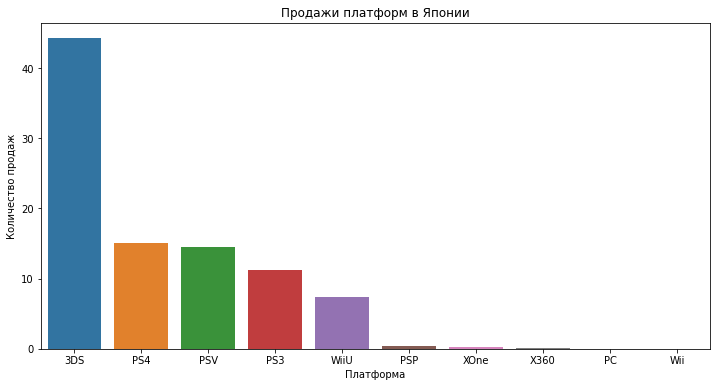

In [47]:
# Строим график продаж в Японии
plt.figure(figsize = (12,6))
sns.barplot(x = pop_platforms_jp_sales['platform'],y = pop_platforms_jp_sales['jp_sales'])
plt.title('Продажи платформ в Японии')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

Таким образом, видим, что самая популярная платформа в Японии это 3DS. Также в топ5 входят платформы: PS4, PSV, PS3, WiiU. Продажи 3DS намного превосходят продажи других платформ.

In [48]:
# Посчитаем долю продаж поппулярных платформ в Японии от общих продаж
platform_jp = pop_platforms_jp_sales.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head()
percent_sale_jp = platform_jp / platform_count_full * 100
display(percent_sale_jp.sort_values(ascending = False).head())

platform
3DS     51.038302
PS3     16.456439
PS4      5.212563
PSV           NaN
WiiU          NaN
dtype: float64

В Японии популярна игра 3DS. Это видно и на примере того, что одна страна покупает эту платформу 51 % от общих продаж в мире.

Вывод: Рассмотрев данные по продажам в конкретных регионах, видим, что больше всего продаж в Северной Америке. Доля продаж только на этом континенте составляет около 50% от всех продаж в мире. Самая продаваемая игра PS4.  На втором месте по продажам игр находится Европа. Самая продаваемая платформа это PS4. В Японии в компьютерные игры играют меньше, чем в Северной Америке и Европе. В отличие от этих регионов в Японии была популярна платформа 3DS. Во всех регионах в актуальный период была популярна платформа PS3. А вот платформа XOne только в Европе и в Северной Америке.

2. Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные жанры (топ-5). Поясните разницу.

In [49]:
# Определяем 5 популярных жанров в Северной Америке
pop_genre_na_sales = data.pivot_table(
    index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
pop_genre_na_sales = pop_genre_na_sales.reset_index().rename_axis(None, axis = 1)
pop_genre_na_sales.head()

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


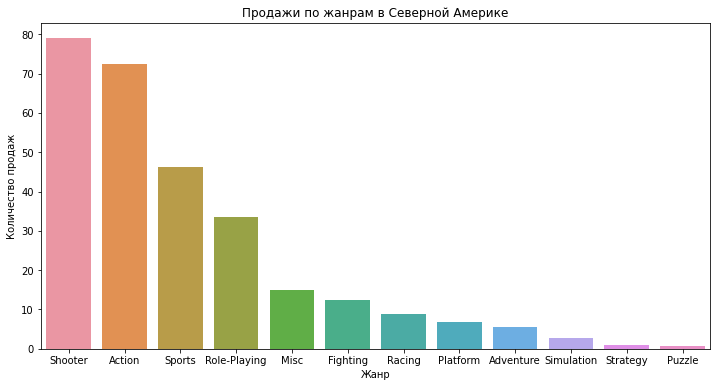

In [50]:
# Строим график продаж по жанрам в Северной Америке
plt.figure(figsize = (12,6))
sns.barplot(x = pop_genre_na_sales['genre'], y = pop_genre_na_sales['na_sales'])
plt.title('Продажи по жанрам в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

Cамые популярные жанры в Северной Америке Shooter, Action, Sports, Shooter, Role_Playing, Misc. Но лидером является Shooter

In [51]:
# Определяем 5 популярных жанров в Европе
pop_genre_eu_sales = data.pivot_table(
    index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
pop_genre_eu_sales = pop_genre_eu_sales.reset_index().rename_axis(None, axis = 1)
pop_genre_eu_sales.head()

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


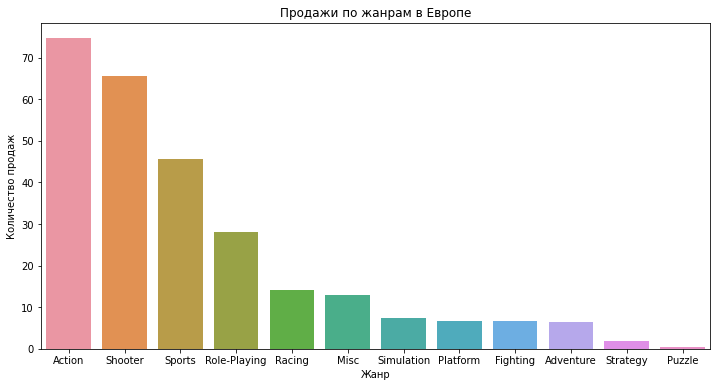

In [52]:
# Строим график продаж по жанрам в Европе
plt.figure(figsize = (12,6))
sns.barplot(x = pop_genre_eu_sales['genre'], y = pop_genre_eu_sales['eu_sales'])
plt.title('Продажи по жанрам в Европе')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

В Европе популярные жанры такие же, как в Северной Америке. Это Action, Sports, Shooter, Role_Playing и Racing. Shooter является популярным, как в Америке, но лидером является Action/

In [53]:
# Определяем 5 поппулярных жанров в Японии
pop_genre_jp_sales = data.pivot_table(
    index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)
pop_genre_jp_sales = pop_genre_jp_sales.reset_index().rename_axis(None, axis = 1)
pop_genre_jp_sales.head()

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


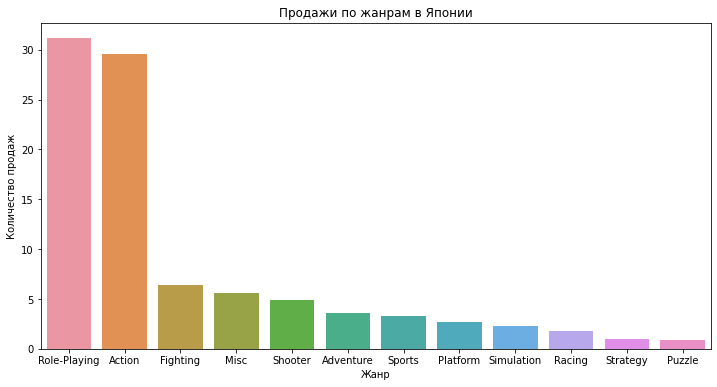

In [54]:
# Строим график продаж по жанрам в Японии
plt.figure(figsize = (12,6))
sns.barplot(x = pop_genre_jp_sales['genre'], y = pop_genre_jp_sales['jp_sales'])
plt.title('Продажи по жанрам в Японии')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

В Японии популярные жанры: Role-playing, Action, Fighting, Misc, Shooter. Жанры Role_Playing и Action одинаково популярны.

Вывод: Cамые популярные жанры в Северной Америке и в Европе Action, Sports, Shooter, Misc. Но большую популярность имеет жанр Shooter. В Японии популярные жанры: Role-playing, Action, Misc, Sports, Platform. Но лидером продаж является жанр Role_Playing, а вот Shooter  вообще не пользуется спросом.

3. Определите для пользователя каждого региона (NA, EU, JP):Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [55]:
# Определяем влияние рейтинга ESRB на продажи в Северной Америке
pop_rating_na_sales = data.pivot_table(
    index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
pop_rating_na_sales = pop_rating_na_sales.reset_index().rename_axis(None, axis = 1)
pop_rating_na_sales.head()


,rating,na_sales
0,M,96.42
1,Unknown,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


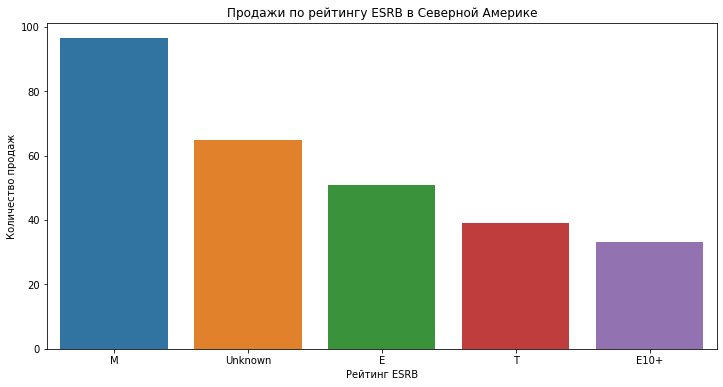

In [56]:
# Строим график продаж по рейтингу ESRB в Северной Америке
plt.figure(figsize = (12,6))
sns.barplot(x = pop_rating_na_sales['rating'], y = pop_rating_na_sales['na_sales'])
plt.title('Продажи по рейтингу ESRB в Северной Америке')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж')
plt.show()

В Северной Америке популярны игры с рейтингом М(для взрослых). На втором месте игры рейтинга Unknown, в которыx рейтинг не определен. Остальные рейтинги игр менее популярные.

In [57]:
# Определяем влияние рейтинга ESRB на продажи в Европе
pop_rating_eu_sales = data.pivot_table(
    index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
pop_rating_eu_sales = pop_rating_eu_sales.reset_index().rename_axis(None, axis = 1)
pop_rating_eu_sales.head()

,rating,eu_sales
0,M,93.44
1,Unknown,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


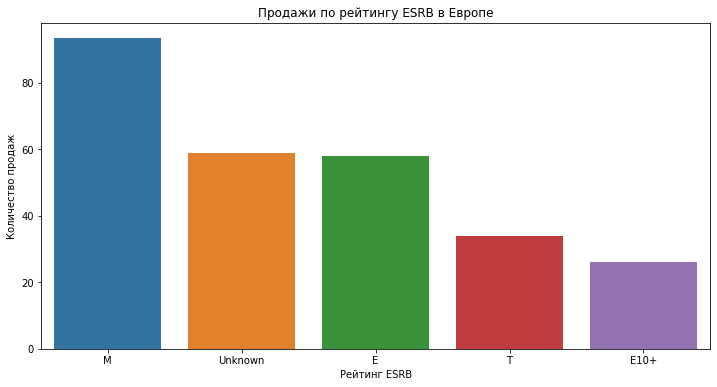

In [58]:
# Строим график продаж по рейтингу ESRB в Европе
plt.figure(figsize = (12,6))
sns.barplot(x = pop_rating_eu_sales['rating'], y = pop_rating_eu_sales['eu_sales'])
plt.title('Продажи по рейтингу ESRB в Европе')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж')
plt.show()

В Европе наблюдается такая же ситуация по продажам игр, как и в Северной Америке. Популярны игры с рейтингом М(для взрослых).

In [59]:
# Определяем влияние рейтинга ESRB на продажи в Японии
pop_rating_jp_sales = data.pivot_table(
    index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)
pop_rating_jp_sales = pop_rating_jp_sales.reset_index().rename_axis(None, axis = 1)
pop_rating_jp_sales.head()

,rating,jp_sales
0,Unknown,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


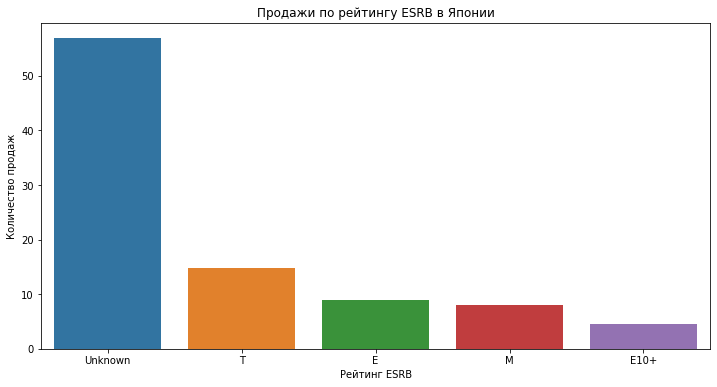

In [60]:
# Строим график продаж по рейтингу ESRB в Японии
plt.figure(figsize = (12,6))
sns.barplot(x = pop_rating_jp_sales['rating'], y = pop_rating_jp_sales['jp_sales'])
plt.title('Продажи по рейтингу ESRB в Японии')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж')
plt.show()

В Японии большую популярность имеют игры категории Unknown и Т(от 13 лет). В отличие от Северной Америки и Европы игры для взрослых стоят на четвертом месте.

Вывод:
В Северной Америке и Европе выбор игровых платформ по рейтингу одинаковый. Популярностью пользуются игры М(для взрослых). В Японии предпочтение отдают играм рейтинга Unknown и Т(для подростков)

**Вывод:** Можно составить следующий портрет пользователя по регионам. В Северной Америке самая популярная платформа PS4 жанр Shooter рейинга М(для взрослых). В Европе картина похожа: популярная платформа как и в Северной Америке стала игра PS4 жанр Shooter рейинга М(для взрослых). В Японии другая ситуация: предпочтение отдают игровой платформе 3DS жанр Role-playing рейтинга Unknown, т.е. рейтинг не определен.  Таким образом видим, что пользователи в Америке и Европе имеют одинаковые предпочтения, в Японии вкусы отличаются. Скорее всего это связано с культурой и менталитетом. Но так как основные продажи приходятся на Северную Америку и Европу, то для прогноза на следующий год нужно ориентироваться именно предпочтения этих регионов. Для прогноза будущих продаж лучше брать данные за актуальный период, так как технологии и вкусы меняются быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом для взрослых.

### Проверьте гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [61]:
# Сохраним в переменных xone_platform и pc_platform соответствующие данные (за последние 10 лет)
xone_platform = data[(data['platform'] == 'XOne') & (data['year_of_release'] > 2005)]['user_score']
pc_platform = data[(data['platform']=='PC') & (data['year_of_release'] > 2005)]['user_score']

In [62]:
# Проверим гипотезу о равенстве среднего двух ген. совокупностей с помощью метода scipy.stats.ttest_ind()
# Избавимся от пропущенных значений, чтобы они не мешали сравнивать
alpha = .05
results = st.ttest_ind(xone_platform.dropna(), pc_platform.dropna(), equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Значение p-value равно 10%. Таким образом, не получилось отвергнуть нулевую гипотезу. То есть, с вероятностью в 10% можно получить различность рейтингов двух платформ

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [63]:
# Сохраним в переменных genre_action и genre_sports соответствующие данные с пользовательскими оценками
genre_action = data[(data['genre'] == 'Action') & (data['year_of_release'] > 2005)]['user_score']
genre_sports = data[(data['genre'] == 'Sports') & (data['year_of_release'] > 2005)]['user_score']

In [64]:
# Проверим гипотезу о равенстве среднего двух ген. совокупностей с помощью метода scipy.stats.ttest_ind()
# Избавимся от пропущенных значений, чтобы они не мешали сравнивать
alpha = .05
results = st.ttest_ind(genre_action.dropna(), genre_sports.dropna(), equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинаковые средние рейнтинги по двум жанрам.

Вывод: Для проверки гипотез о равенстве двух совокупностей по взятым из них выборкам использовали спец метод scipy.stats.ttest_ind(). Так как у нас есть сомнения , что дисперсии у совокупностей одинаковые, указали параметр equal_var как False и тест посчитал дисперсии выборок по отдельности. Задали alpha (критический уровень статистической зависимости) равный 0.05. В первом не получилось отвергнуть нулевую гипотезу. То есть, с вероятностью в 10% можно получить различность рейтингов двух платформ, а во втором случае отвергли гипотезу.

### Общий вывод

Рассмотрели данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

На этапе предобработки данных поменяли названия столбцов, привели их к нижнему регистру. Увидели, что имеются пропущенные значения в столбцах. В столбцах year_of_release, name и genre строки с пропущенными значениями удалили, так как их было мало, а также в столбце year_of_release поменяли тип данных на int. В столбцах critic_score и user_score пропущенные значения оставили без изменений, так как nan имеет тип float и они не помешали нам в исследовании. В столбце rating пропуски заменили на Unknown. В столбце user_score сокращение tbd заменили на nan и поменяли тип данных этого столбца на float.

Проведя исследовательский анализ данных, видим, что выпуск игр увеличивается с 1995 года. До этого года выпускались единицы. Особенный рост с 2000 года. Пик приходится на 2006-2011 годы. В среднем каждая игровая платформа существует примерно 10 лет. За актуальный период взяли с 2014 по 2016 годы. Так как игровая индустрия сильно изменчива, то для прогноза на следующий год нецелесообразно рассматривать периоды больше2-3х лет. Так как данные за 2016 год не полные, то в актуальный период включили и 2014 год. Только 5 платформ являются лидерами продаж. Это PS4, XOne, 3DS, X360, PS3. Wii быстро стала поппулярна, но очень быстро исчезла. Рассмотрев зависимость продаж популярных платформ от оценки пользователей и критиков, видим, что продажа поппулярных игр не имеет зависимостb от оценки пользователей, в то время как оценка критиков влияет на продажи. Самые прибыльный жанр - Shooter.А жанр Puzzle продается меньше всего.

Составили следующий портрет пользователя по регионам. В Северной Америке самая популярная платформа PS4 жанр Shooter рейинга М(для взрослых). В Европе картина похожа: популярная платформа как и в Северной Америке стала игра PS4 жанр Shooter рейинга М(для взрослых). В Японии другая ситуация: предпочтение отдают игровой платформе 3DS жанр Role-playing рейтинга Unknown, т.е. рейтинг не определен. Таким образом видим, что пользователи в Америке и Европе имеют одинаковые предпочтения, в Японии вкусы отличаются. 

Для проверки гипотез о равенстве двух совокупностей по взятым из них выборкам использовали спец метод scipy.stats.ttest_ind(). Так как у нас есть сомнения , что дисперсии у совокупностей одинаковые, указали параметр equal_var как False и тест посчитал дисперсии выборок по отдельности. Задали alpha (критический уровень статистической зависимости) равный 0.05. В первом не получилось отвергнуть нулевую гипотезу. То есть, с вероятностью в 10% можно получить различность рейтингов двух платформ, а во втором случае отвергли гипотезу.

Так как основные продажи приходятся на Северную Америку и Европу, то для прогноза на следующий год нужно ориентироваться на предпочтения этих регионов. Для прогноза будущих продаж лучше брать данные за актуальный период, так как технологии и вкусы меняются быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом для взрослых.